In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [4]:
# Load the dataset
mnist_data = pd.read_csv("/content/sample_data/mnist_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/mnist_test.csv'

In [ ]:
# Display the first few rows of the dataset
mnist_data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(mnist_data.columns)

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)


In [ ]:
# Split the dataset into features and labels
X = mnist_data.drop("7", axis=1)
y = mnist_data["7"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train an SVM classifier
clf = svm.SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.55%


In [ ]:
# You can also print a classification report and confusion matrix
print(metrics.classification_report(y_test, y_pred))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       205
           1       0.94      1.00      0.97       218
           2       0.88      0.93      0.90       192
           3       0.89      0.91      0.90       201
           4       0.91      0.91      0.91       205
           5       0.91      0.87      0.89       198
           6       0.95      0.97      0.96       186
           7       0.96      0.93      0.94       193
           8       0.94      0.86      0.90       191
           9       0.91      0.91      0.91       211

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



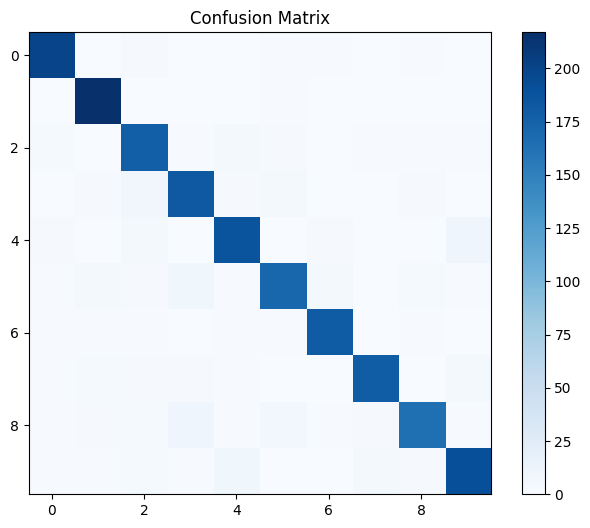

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

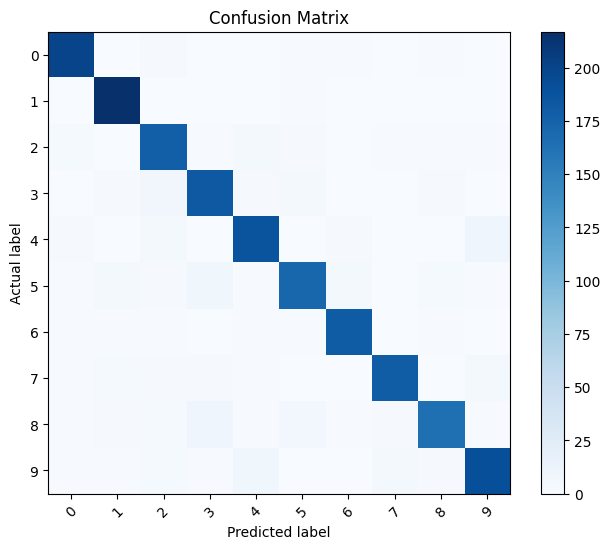

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()